## Step 1. 인물모드 직접 해 보기

In [1]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구

import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

Profile shape: (450, 450, 3)
Dog shape: (4032, 3024, 3)
Dog 2 shape: (4032, 3024, 3)
Chair shape: (3024, 3024, 3)


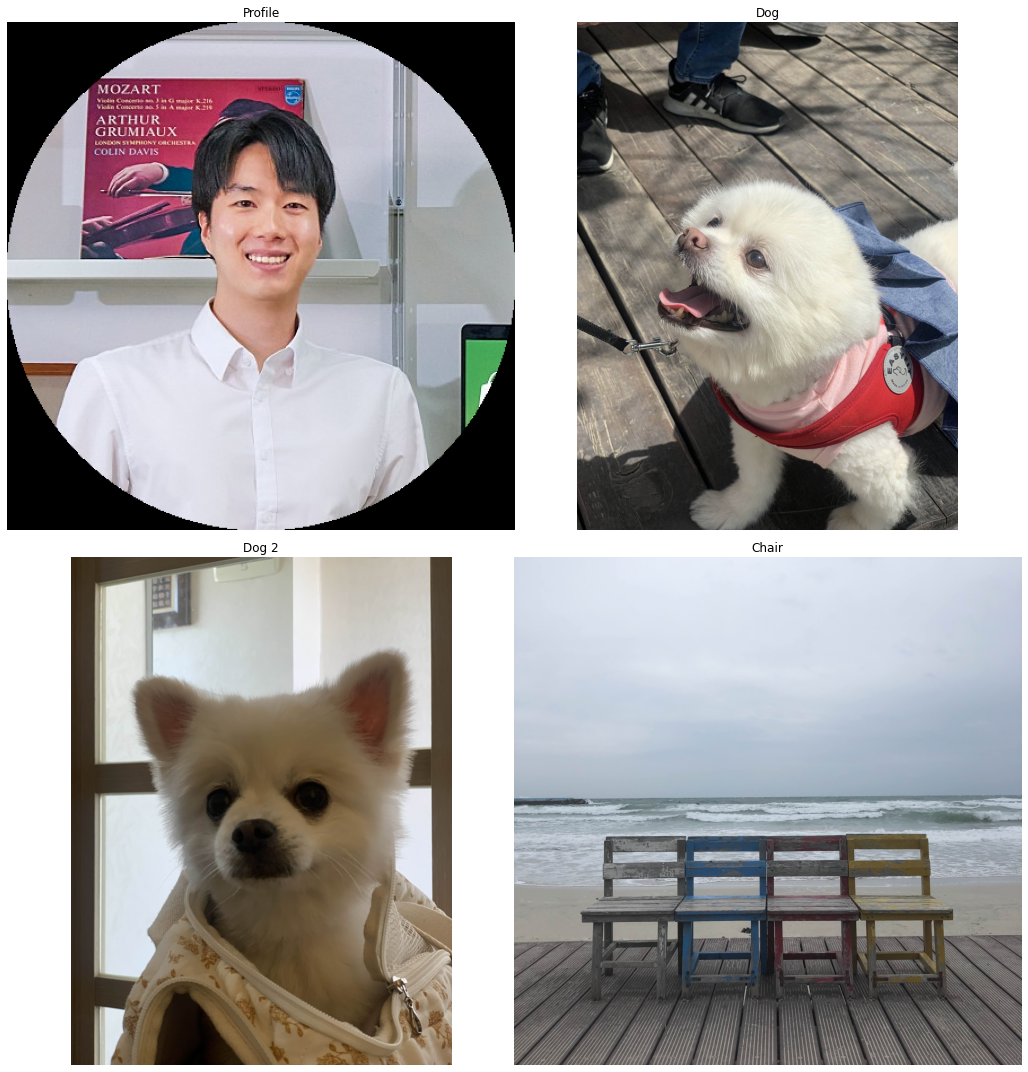

In [4]:
# 이미지 경로 설정
profile_path = os.getenv('HOME')+'/aiffel/profile.png'
dog_path = os.getenv('HOME')+'/aiffel/dog.jpg'
dog_2_path = os.getenv('HOME')+'/aiffel/dog_2.jpg'
chair_path = os.getenv('HOME')+'/aiffel/chair.jpg'

# 이미지 읽기
img_profile = cv2.imread(profile_path)
img_dog = cv2.imread(dog_path)
img_dog_2 = cv2.imread(dog_2_path)
img_chair = cv2.imread(chair_path)

# 이미지 shape 출력
print("Profile shape:", img_profile.shape)
print("Dog shape:", img_dog.shape)
print("Dog 2 shape:", img_dog_2.shape)
print("Chair shape:", img_chair.shape)

# 2x2 subplot 생성
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# 각 subplot에 이미지 표시
axs[0, 0].imshow(cv2.cvtColor(img_profile, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Profile')
axs[0, 1].imshow(cv2.cvtColor(img_dog, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Dog')
axs[1, 0].imshow(cv2.cvtColor(img_dog_2, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Dog 2')
axs[1, 1].imshow(cv2.cvtColor(img_chair, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Chair')

# 각 subplot의 축 제거
for ax in axs.flat:
    ax.axis('off')

# 전체 그림 표시
plt.tight_layout()
plt.show()


In [5]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7abc67309d30>)

In [6]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [8]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

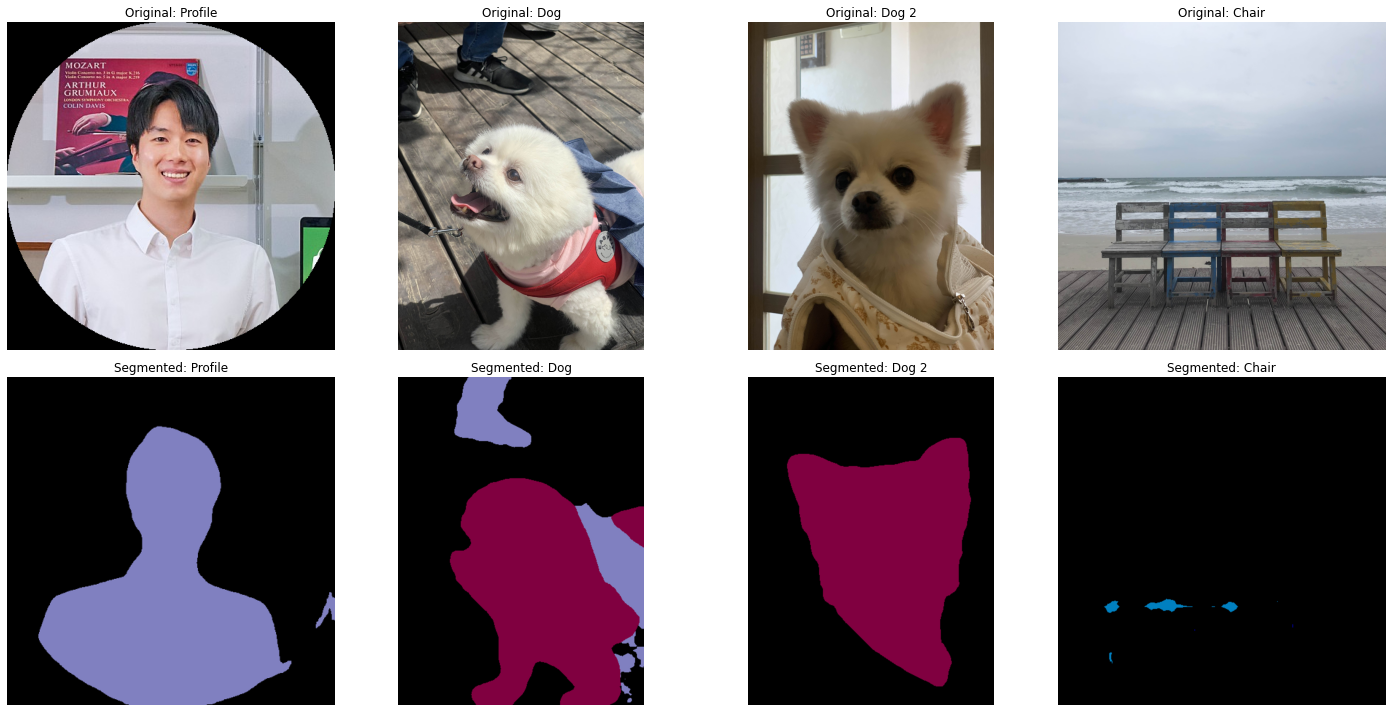


Segmentation values for Profile:
{'class_ids': array([ 0, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}

Segmentation values for Dog:
{'class_ids': array([ 0, 12, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}

Segmentation values for Dog 2:
{'class_ids': array([ 0, 12]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, Fa

In [11]:
# 이미지 경로 리스트
img_paths = [profile_path, dog_path, dog_2_path, chair_path]
img_titles = ['Profile', 'Dog', 'Dog 2', 'Chair']

# 세그멘테이션 결과를 저장할 리스트
segvalues_list = []
outputs_list = []

# 2x4 subplot 생성 (원본 이미지와 분할 결과를 나란히 표시)
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, (img_path, title) in enumerate(zip(img_paths, img_titles)):
    # 원본 이미지 읽기
    img_orig = cv2.imread(img_path)
    img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
    
    # 세그멘테이션 수행
    segvalues, output = model.segmentAsPascalvoc(img_path)
    
    # 세그멘테이션 결과 저장
    segvalues_list.append(segvalues)
    outputs_list.append(output)
    
    # 원본 이미지 표시
    axs[0, i].imshow(img_orig)
    axs[0, i].set_title(f'Original: {title}')
    axs[0, i].axis('off')
    
    # 세그멘테이션 결과 표시
    axs[1, i].imshow(output)
    axs[1, i].set_title(f'Segmented: {title}')
    axs[1, i].axis('off')

# 전체 그림 표시
plt.tight_layout()
plt.show()

# for 루프 밖에서 세그멘테이션 결과 사용 예시
for i, (title, segvalues, output) in enumerate(zip(img_titles, segvalues_list, outputs_list)):
    print(f"\nSegmentation values for {title}:")
    print(segvalues)
    
    # 필요한 경우 output 이미지 저장
    # cv2.imwrite(f'segmented_{title}.jpg', cv2.cvtColor(output, cv2.COLOR_RGB2BGR))

In [15]:
for img_title, segvalues in zip(img_titles, segvalues_list):
    print(f"\nLabels detected in {img_title}:")
    unique_class_ids = set(segvalues['class_ids'])  # 중복 제거
    for class_id in unique_class_ids:
        print(f"- {LABEL_NAMES[class_id]}")
    print()


Labels detected in Profile:
- background
- person


Labels detected in Dog:
- background
- dog
- person


Labels detected in Dog 2:
- background
- dog


Labels detected in Chair:
- background
- chair
- diningtable



In [16]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [18]:
person_color = colormap[15]
dog_color = colormap[12]
chair_color = colormap[9]

print("Person color:", person_color)
print("Dog color:", dog_color)
print("Chair color:", chair_color)

Person color: [192 128 128]
Dog color: [ 64   0 128]
Chair color: [192   0   0]


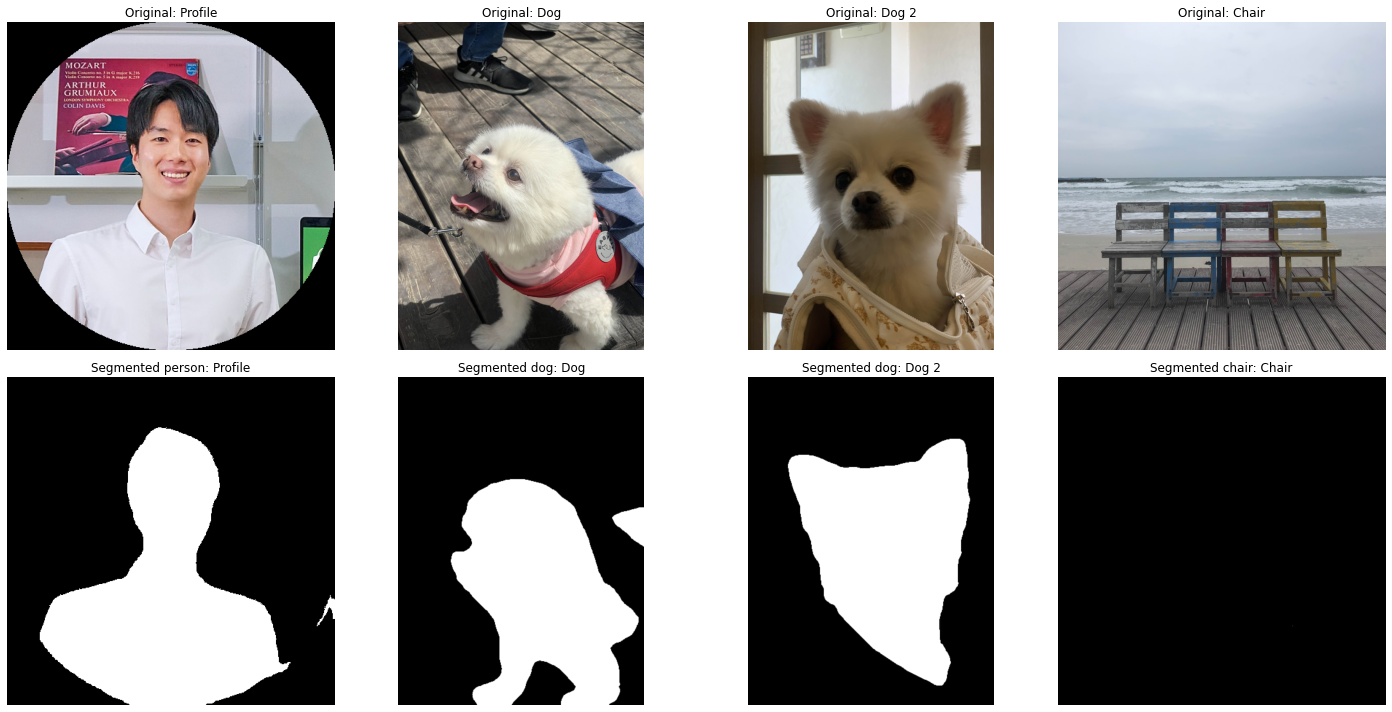

Profile segmentation map shape for person: (450, 450)
Dog segmentation map shape for dog: (4032, 3024)
Dog 2 segmentation map shape for dog: (4032, 3024)
Chair segmentation map shape for chair: (3024, 3024)


In [20]:
# 컬러맵 정의 (RGB 순서)
colormap = [
    (0, 0, 0),        # 0: background
    (128, 0, 0),      # 1: aeroplane
    (0, 128, 0),      # 2: bicycle
    (128, 128, 0),    # 3: bird
    (0, 0, 128),      # 4: boat
    (128, 0, 128),    # 5: bottle
    (0, 128, 128),    # 6: bus
    (128, 128, 128),  # 7: car
    (64, 0, 0),       # 8: cat
    (192, 0, 0),      # 9: chair
    (64, 128, 0),     # 10: cow
    (192, 128, 0),    # 11: diningtable
    (64, 0, 128),     # 12: dog
    (192, 0, 128),    # 13: horse
    (64, 128, 128),   # 14: motorbike
    (192, 128, 128),  # 15: person
    (0, 64, 0),       # 16: pottedplant
    (128, 64, 0),     # 17: sheep
    (0, 192, 0),      # 18: sofa
    (128, 192, 0),    # 19: train
    (0, 64, 128)      # 20: tvmonitor
]

# 각 이미지에 대한 강조할 객체 정의
highlight_objects = {
    'Profile': 'person',
    'Dog': 'dog',
    'Dog 2': 'dog',
    'Chair': 'chair'
}

# LABEL_NAMES 정의
LABEL_NAMES = [
    "background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair",
    "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa",
    "train", "tvmonitor"
]

# 2x4 subplot 생성
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, (img_title, output) in enumerate(zip(img_titles, outputs_list)):
    # 원본 이미지 표시
    axs[0, i].imshow(cv2.cvtColor(cv2.imread(img_paths[i]), cv2.COLOR_BGR2RGB))
    axs[0, i].set_title(f'Original: {img_title}')
    axs[0, i].axis('off')
    
    # 강조할 객체의 색상 가져오기
    highlight_object = highlight_objects[img_title]
    object_index = LABEL_NAMES.index(highlight_object)
    seg_color = colormap[object_index]
    
    # BGR로 변환 (OpenCV 이미지 형식)
    seg_color_bgr = (seg_color[2], seg_color[1], seg_color[0])
    
    # 세그멘테이션 맵 생성
    seg_map = np.all(output == seg_color_bgr, axis=-1)
    
    # 세그멘테이션 결과 표시
    axs[1, i].imshow(seg_map, cmap='gray')
    axs[1, i].set_title(f'Segmented {highlight_object}: {img_title}')
    axs[1, i].axis('off')

# 전체 그림 표시
plt.tight_layout()
plt.show()

# 각 이미지의 세그멘테이션 맵 형태 출력
for img_title, output in zip(img_titles, outputs_list):
    highlight_object = highlight_objects[img_title]
    object_index = LABEL_NAMES.index(highlight_object)
    seg_color = colormap[object_index]
    seg_color_bgr = (seg_color[2], seg_color[1], seg_color[0])
    seg_map = np.all(output == seg_color_bgr, axis=-1)
    print(f"{img_title} segmentation map shape for {highlight_object}: {seg_map.shape}")


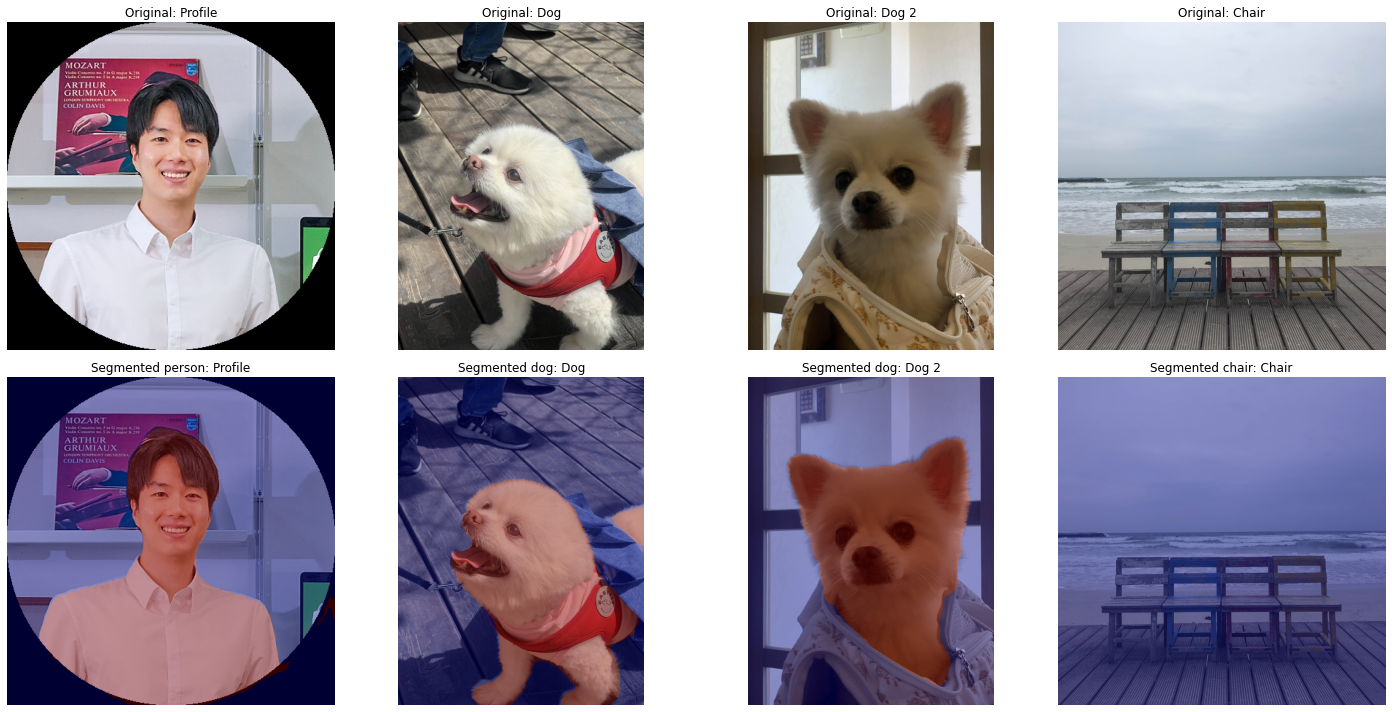

In [21]:
# 2x4 subplot 생성
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, (img_title, img_path, output) in enumerate(zip(img_titles, img_paths, outputs_list)):
    # 원본 이미지 읽기
    img_orig = cv2.imread(img_path)
    img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
    
    # 원본 이미지 표시
    axs[0, i].imshow(img_orig)
    axs[0, i].set_title(f'Original: {img_title}')
    axs[0, i].axis('off')
    
    # 강조할 객체의 색상 가져오기
    highlight_object = highlight_objects[img_title]
    object_index = LABEL_NAMES.index(highlight_object)
    seg_color = colormap[object_index]
    seg_color_bgr = (seg_color[2], seg_color[1], seg_color[0])
    
    # 세그멘테이션 맵 생성
    seg_map = np.all(output == seg_color_bgr, axis=-1)
    
    # 마스크 생성
    img_mask = seg_map.astype(np.uint8) * 255
    
    # 컬러 마스크 생성
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    
    # 원본 이미지와 마스크 합성
    img_show = cv2.addWeighted(cv2.cvtColor(img_orig, cv2.COLOR_RGB2BGR), 0.6, color_mask, 0.4, 0.0)
    
    # 합성된 이미지 표시
    axs[1, i].imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    axs[1, i].set_title(f'Segmented {highlight_object}: {img_title}')
    axs[1, i].axis('off')

# 전체 그림 표시
plt.tight_layout()
plt.show()

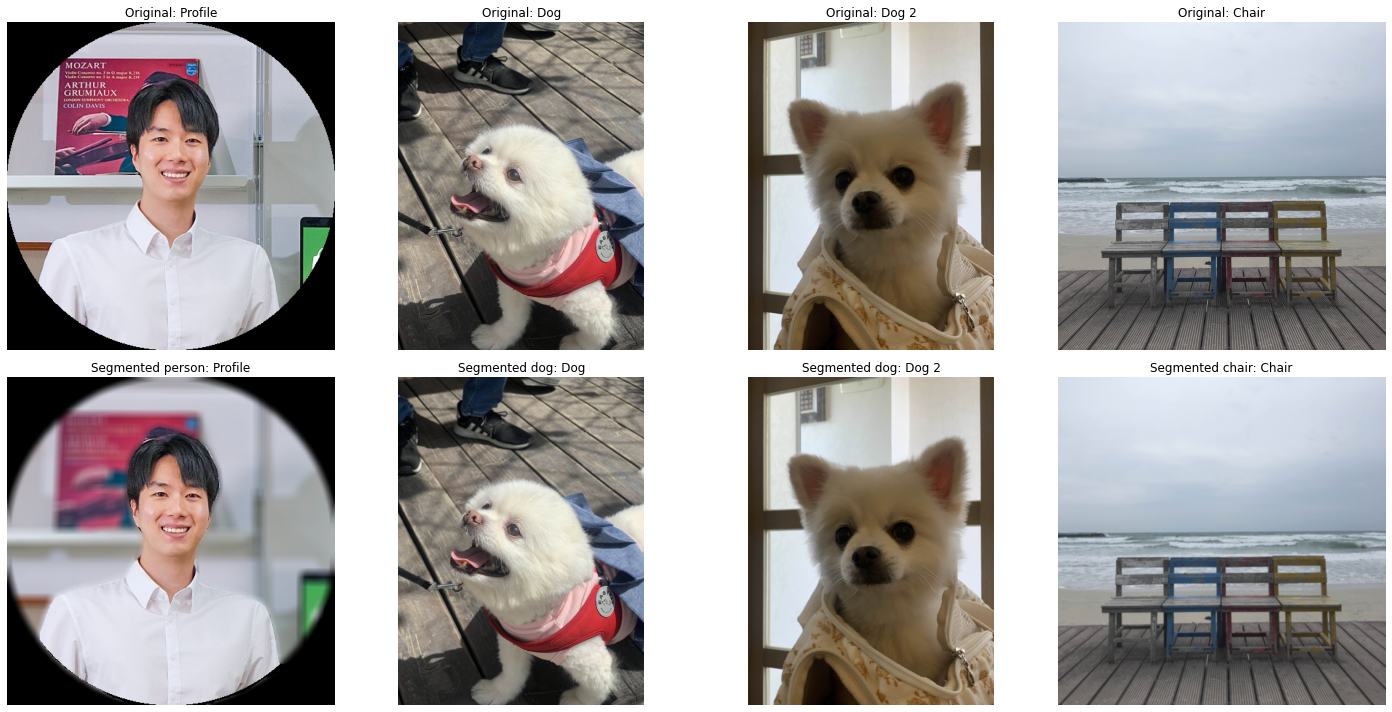

In [23]:
# 전역 변수로 이미지들을 저장할 리스트 생성
img_orig_list = []

# 2x4 subplot 생성
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, (img_title, img_path, output) in enumerate(zip(img_titles, img_paths, outputs_list)):
    # 원본 이미지 읽기
    img_orig = cv2.imread(img_path)
    img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
    
    # 원본 이미지를 리스트에 저장
    img_orig_list.append(img_orig)
    
    # 원본 이미지 표시
    axs[0, i].imshow(img_orig)
    axs[0, i].set_title(f'Original: {img_title}')
    axs[0, i].axis('off')
    
    # 강조할 객체의 색상 가져오기
    highlight_object = highlight_objects[img_title]
    object_index = LABEL_NAMES.index(highlight_object)
    seg_color = colormap[object_index]
    seg_color_bgr = (seg_color[2], seg_color[1], seg_color[0])
    
    # 세그멘테이션 맵 생성
    seg_map = np.all(output == seg_color_bgr, axis=-1)
    
    # 마스크 생성
    img_mask = seg_map.astype(np.uint8) * 255
    
    # 블러 적용
    img_blur = cv2.blur(img_orig, (13, 13))
    
    # np.where를 사용하여 세그멘테이션된 부분만 원본 이미지를 보여주고 나머지는 블러 처리
    img_concat = np.where(np.expand_dims(img_mask, axis=-1) == 255, img_orig, img_blur)
    
    # 결과 이미지 표시
    axs[1, i].imshow(img_concat)
    axs[1, i].set_title(f'Segmented {highlight_object}: {img_title}')
    axs[1, i].axis('off')

# 전체 그림 표시
plt.tight_layout()
plt.show()

## Step 2. 사진에서 문제점 찾기


### 문제 상황
- 블러 효과를 적용했을 때 일부 객체(dog, chair)의 세그멘테이션 결과가 잘 구분되지 않음

### 문제점 분석
1. 블러 효과는 이미지 전체의 선명도를 감소시켜 세그멘테이션된 객체의 경계를 모호하게 만듦
2. 객체의 크기와 배경의 유사성으로 인해 시각적 구분이 어려움

### 해결 방안
- 흑백 처리를 통해 세그멘테이션된 객체와 배경의 대비를 높임
- 객체 외곽선에 색상(예: 빨간색)을 추가하여 경계를 명확히 표시
- 다양한 시각화 기법 적용 (색상 반전, 히트맵 등)

### 개선된 코드 적용 결과
- 세그멘테이션된 객체를 컬러로 유지
- 배경을 흑백으로 처리
- 객체 외곽선을 빨간색으로 강조

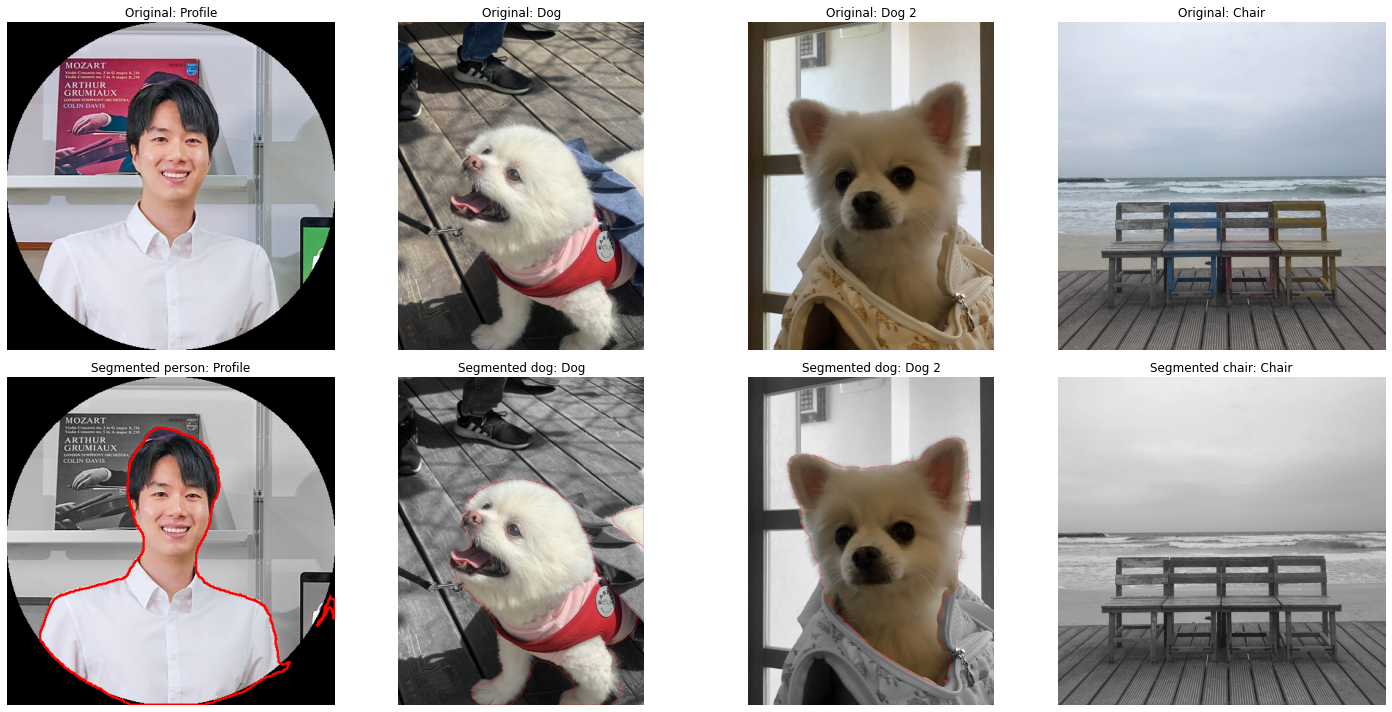

In [25]:
# 전역 변수로 이미지들을 저장할 리스트 생성
img_orig_list = []

# 2x4 subplot 생성
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, (img_title, img_path, output) in enumerate(zip(img_titles, img_paths, outputs_list)):
    # 원본 이미지 읽기
    img_orig = cv2.imread(img_path)
    img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
    
    # 원본 이미지를 리스트에 저장
    img_orig_list.append(img_orig)
    
    # 원본 이미지 표시
    axs[0, i].imshow(img_orig)
    axs[0, i].set_title(f'Original: {img_title}')
    axs[0, i].axis('off')
    
    # 강조할 객체의 색상 가져오기
    highlight_object = highlight_objects[img_title]
    object_index = LABEL_NAMES.index(highlight_object)
    seg_color = colormap[object_index]
    seg_color_bgr = (seg_color[2], seg_color[1], seg_color[0])
    
    # 세그멘테이션 맵 생성
    seg_map = np.all(output == seg_color_bgr, axis=-1)
    
    # 마스크 생성
    img_mask = seg_map.astype(np.uint8) * 255
    
    # 흑백 이미지 생성
    img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
    img_gray = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)
    
    # np.where를 사용하여 세그멘테이션된 부분만 원본 이미지를 보여주고 나머지는 흑백 처리
    img_concat = np.where(np.expand_dims(img_mask, axis=-1) == 255, img_orig, img_gray)
    
    # 결과 이미지에 빨간색 외곽선 추가
    contours, _ = cv2.findContours(img_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_concat = cv2.drawContours(img_concat, contours, -1, (255, 0, 0), 2)
    
    # 결과 이미지 표시
    axs[1, i].imshow(img_concat)
    axs[1, i].set_title(f'Segmented {highlight_object}: {img_title}')
    axs[1, i].axis('off')

# 전체 그림 표시
plt.tight_layout()
plt.show()

### 문제 상황
1. chair 이미지에서 의자를 정확하게 세그멘테이션하지 못함
2. 강아지가 옷을 입고 있을 경우 세그멘테이션에 포함되지 않음

### 문제점 분석
1. 의자 세그멘테이션 실패
   - 모델이 의자의 특징을 정확히 인식하지 못함
   - 의자의 복잡한 구조나 배경과의 유사성이 원인일 수 있음

2. 강아지 옷 세그멘테이션 문제
   - 모델이 옷을 입은 강아지의 전체 형태를 인식하지 못함
   - 학습 데이터에 옷을 입은 강아지 이미지가 부족했을 가능성

## Step 3. 해결 방법을 제안해 보기

#### 1. 의자 세그멘테이션 문제 해결:

a) 다중 스케일 특징 융합:
   - DeepLab 모델의 다양한 레이어에서 추출한 특징 맵을 융합합니다.
   - 저해상도 특징에서 의자의 전체적인 형태를, 고해상도 특징에서 의자의 세부 구조를 포착합니다.
   - 이를 통해 의자의 복잡한 구조를 더 정확하게 인식할 수 있습니다.

b) 데이터 증강 및 모델 재학습:
   - 다양한 스타일, 재질, 구조의 의자 이미지를 포함한 데이터셋으로 모델을 재학습합니다.
   - 배경과 유사한 색상의 의자, 투명한 재질의 의자 등 challenging case를 추가합니다.
   - 데이터 증강 기법(회전, 크기 변경, 색상 변경 등)을 적용하여 모델의 일반화 능력을 향상시킵니다.

#### 2. 옷을 입은 강아지 세그멘테이션 문제 해결:

a) 경계 정제 알고리즘 적용:
   - 세그멘테이션 마스크의 경계에 CRF(Conditional Random Field) 알고리즘을 적용합니다.
   - 이를 통해 강아지의 윤곽과 옷의 경계를 더 정확하게 구분할 수 있습니다.
   - 옷을 입은 부분과 강아지의 몸체를 하나의 객체로 인식하도록 유도합니다.

b) 데이터 증강 및 모델 재학습:
   - 다양한 의상을 입은 강아지 이미지를 포함한 데이터셋으로 모델을 재학습합니다.
   - 여러 종류의 강아지 옷(조끼, 스웨터, 코스튬 등)을 포함시켜 모델의 인식 범위를 넓힙니다.
   - 데이터 증강 기법을 활용하여 다양한 포즈, 크기, 색상의 옷을 입은 강아지 이미지를 생성합니다.

c) 객체 인식과 세그멘테이션의 결합:
   - 객체 인식 모델(예: YOLO)을 활용하여 강아지를 먼저 감지합니다.
   - 감지된 영역 내에서 세부적인 세그멘테이션을 수행하여 옷을 입은 강아지 전체를 하나의 객체로 인식합니다.